In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd drive/My Drive/keras-u-net-master

/content/drive/My Drive/keras-u-net-master


In [0]:
from __future__ import print_function

import os
import numpy as np

from skimage.io import imsave, imread
from PIL import Image
data_path = 'data/'

image_rows = 512
image_cols = 512


def create_train_data():
    train_data_path = os.path.join(data_path, 'train/Image PP/')
    train_data_Label_path = os.path.join(data_path, 'train/Label/')
    images = os.listdir(train_data_path)
    total = len(images)

    imgs = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)
    imgs_mask = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)

    i = 0
    print('-'*30)
    print('Creating training images...')
    print('-'*30)
    for image_name in images:
        img = imread(os.path.join(train_data_path, image_name), as_gray=True)
        img_mask = imread(os.path.join(train_data_Label_path, image_name), as_gray=True)

        img = np.array([img])
        img_mask = np.array([img_mask])

        imgs[i] = img
        imgs_mask[i] = img_mask

        if i % 50 == 0:
            print('Done: {0}/{1} images'.format(i, total))
        i += 1
    print('Loading done.')

    np.save('imgs_train.npy', imgs)
    np.save('imgs_mask_train.npy', imgs_mask)
    print('Saving to .npy files done.')


def load_train_data():
    imgs_train = np.load('imgs_train.npy')
    imgs_mask_train = np.load('imgs_mask_train.npy')
    return imgs_train, imgs_mask_train


def create_test_data():
    train_data_path = os.path.join(data_path, 'test/Image PP')
    images = os.listdir(train_data_path)
    total = len(images)

    imgs = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)
    imgs_id = np.ndarray((total, ), dtype=np.int32)

    i = 0
    print('-'*30)
    print('Creating test images...')
    print('-'*30)
    for image_name in images:
        img_id = int(image_name.split('.')[0])
        img = imread(os.path.join(train_data_path, image_name), as_gray=True)

        img = np.array([img])

        imgs[i] = img
        imgs_id[i] = img_id

        if i % 10 == 0:
            print('Done: {0}/{1} images'.format(i, total))
        i += 1
    print('Loading done.')

    np.save('imgs_test.npy', imgs)
    np.save('imgs_id_test.npy', imgs_id)
    print('Saving to .npy files done.')

def load_test_data():
    imgs_test = np.load('imgs_test.npy')
    imgs_id = np.load('imgs_id_test.npy')
    return imgs_test, imgs_id

if __name__ == '__main__':
    create_train_data()
    create_test_data()

------------------------------
Creating training images...
------------------------------
Done: 0/150 images
Done: 50/150 images
Done: 100/150 images
Loading done.
Saving to .npy files done.
------------------------------
Creating test images...
------------------------------
Done: 0/60 images
Done: 10/60 images
Done: 20/60 images
Done: 30/60 images
Done: 40/60 images
Done: 50/60 images
Loading done.
Saving to .npy files done.


Using TensorFlow backend.


Loading and preprocessing train data...
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 256, 256, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 256, 256, 64) 256         block1_conv1[0][0]               
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 256, 256, 64) 0           batch_normalization_1[0][0]      
____________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:211: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 120 samples, validate on 30 samples
Epoch 1/1000
120/120 [==============================] - 23s 195ms/step - loss: 1.0472 - dice_coef: 0.1166 - acc: 0.2466 - mean_io_u: 0.4778 - mean_absolute_error: 0.5984 - val_loss: 0.7168 - val_dice_coef: 0.1248 - val_acc: 0.3471 - val_mean_io_u: 0.4761 - val_mean_absolute_error: 0.5075
Epoch 2/1000
120/120 [==============================] - 6s 49ms/step - loss: 1.0055 - dice_coef: 0.1241 - acc: 0.2588 - mean_io_u: 0.4759 - mean_absolute_error: 0.5871 - val_loss: 0.7079 - val_dice_coef: 0.1243 - val_acc: 0.4468 - val_mean_io_u: 0.4761 - val_mean_absolute_error: 0.5031
Epoch 3/1000
120/120 [==============================] - 6s 49ms/step - loss: 0.9621 - dice_coef: 0.1288 - acc: 0.2852 - mean_io_u: 0.4763 - mean_absolute_error: 0.5741 - val_loss: 0.7023 - val_dice_coef: 0.1240 - val_acc: 0.4932 - val_mean_io_u: 0.4761 - val_mean_absolute_error: 0.5003
Epoch 4/1000
120/120 [==============================] - 6s 49ms/step - loss: 0.9174 - dice_c

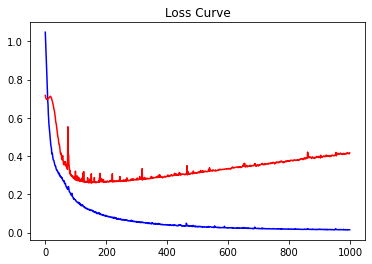

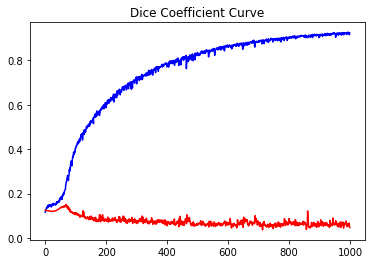

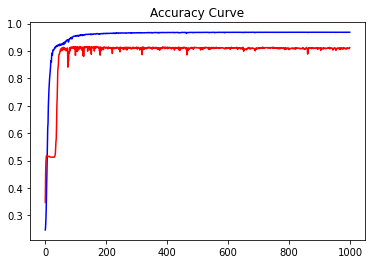

In [0]:
from __future__ import print_function
import tensorflow as tf
import os
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose, Activation
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras import backend as K
from keras import losses,metrics
from keras.callbacks import ModelCheckpoint
														  
from data_preparation import load_train_data, load_test_data


smooth = 1.


def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return dice_coef(y_true, y_pred)


img_w, img_h = (256, 256) 
                
def unet(num_classes, input_shape, lr_init, lr_decay, vgg_weight_path=None):
    img_input = Input(input_shape)

    # Block 1
    x = Conv2D(64, (3, 3), padding='same', name='block1_conv1')(img_input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(64, (3, 3), padding='same', name='block1_conv2')(x)
    x = BatchNormalization()(x)
    block_1_out = Activation('relu')(x)

    x = MaxPooling2D()(block_1_out)

    # Block 2
    x = Conv2D(128, (3, 3), padding='same', name='block2_conv1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(128, (3, 3), padding='same', name='block2_conv2')(x)
    x = BatchNormalization()(x)
    block_2_out = Activation('relu')(x)

    x = MaxPooling2D()(block_2_out)

    # Block 3
    x = Conv2D(256, (3, 3), padding='same', name='block3_conv1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(256, (3, 3), padding='same', name='block3_conv2')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(256, (3, 3), padding='same', name='block3_conv3')(x)
    x = BatchNormalization()(x)
    block_3_out = Activation('relu')(x)

    x = MaxPooling2D()(block_3_out)

    # Block 4
    x = Conv2D(512, (3, 3), padding='same', name='block4_conv1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(512, (3, 3), padding='same', name='block4_conv2')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(512, (3, 3), padding='same', name='block4_conv3')(x)
    x = BatchNormalization()(x)
    block_4_out = Activation('relu')(x)

    x = MaxPooling2D()(block_4_out)

    # Block 5
    x = Conv2D(512, (3, 3), padding='same', name='block5_conv1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(512, (3, 3), padding='same', name='block5_conv2')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(512, (3, 3), padding='same', name='block5_conv3')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    for_pretrained_weight = MaxPooling2D()(x)

    # Load pretrained weights.
    if vgg_weight_path is not None:
        vgg16 = Model(img_input, for_pretrained_weight)
        vgg16.load_weights(vgg_weight_path, by_name=True)

    # UP 1
    x = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = concatenate([x, block_4_out])
    x = Conv2D(512, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(512, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # UP 2
    x = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = concatenate([x, block_3_out])
    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # UP 3
    x = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = concatenate([x, block_2_out])
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # UP 4
    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = concatenate([x, block_1_out])
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # last conv
    x = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    model = Model(img_input, x)

    #model.compile(optimizer=Adam(lr=1e-5), loss='binary_crossentropy', metrics=[dice_coef,'acc', tf.keras.metrics.MeanIoU(num_classes=2),metrics.mae])
    #model.compile(optimizer=Adam(lr=1e-5), loss='binary_crossentropy', metrics=[metrics.binary_accuracy,keras_metrics.binary_precision(),keras_metrics.binary_recall()])
    #model.compile(optimizer=Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
    model.compile(optimizer=Adam(lr=lr_init, decay=lr_decay),loss='binary_crossentropy',metrics=[dice_coef,'acc', tf.keras.metrics.MeanIoU(num_classes=2),metrics.mae])
    
    return model

def preprocess(imgs):
    imgs_p = np.ndarray((imgs.shape[0], img_w, img_h), dtype=np.uint8)
    for i in range(imgs.shape[0]):
        imgs_p[i] = resize(imgs[i], (img_h, img_w), preserve_range=True)

    imgs_p = imgs_p[..., np.newaxis]
    return imgs_p


def train_and_predict():
    print('Loading and preprocessing train data...')
    imgs_train, imgs_mask_train = load_train_data()

    imgs_train = preprocess(imgs_train)
    imgs_mask_train = preprocess(imgs_mask_train)

    imgs_train = imgs_train.astype('float32')
    mean = np.mean(imgs_train)  # mean for data centering
    std = np.std(imgs_train)  # std for data normalization

    imgs_train -= mean
    imgs_train /= std

    imgs_mask_train = imgs_mask_train.astype('float32')
    imgs_mask_train /= 255.  # scale masks to [0, 1]
    
    #model=unet(1,(512,512,1),1e-5,1e-4,'unet_weights_150_Img_VGG.h5')
    model=unet(1,(256,256,1),1e-5,1e-4)
    print(model.summary())
    
    model_checkpoint = ModelCheckpoint('unet_weights_150_Img_VGG.h5', monitor='val_loss', save_best_only=True)
    print('Fitting model...')
    hist=model.fit(imgs_train, imgs_mask_train, batch_size=16, nb_epoch=1000, verbose=1, shuffle=True,
              validation_split=0.2,
              callbacks=[model_checkpoint])

    imgs_test, imgs_id_test = load_test_data()
    imgs_test = preprocess(imgs_test)
    imgs_test = imgs_test.astype('float32')
    mean=np.mean(imgs_test)
    std=np.std(imgs_test)
    imgs_test -= mean
    imgs_test /= std

    model.load_weights('unet_weights_150_Img_VGG.h5')

    print('Predicting masks on test data...')

    imgs_mask_test = model.predict(imgs_test, verbose=1)
    np.save('imgs_mask_test.npy', imgs_mask_test)
    pred_dir = 'preds_VGG'

    if not os.path.exists(pred_dir):
      os.mkdir(pred_dir)

    for image, image_id in zip(imgs_mask_test, imgs_id_test):
      image = (image[:, :, 0] * 255.).astype(np.uint8)
      imsave(os.path.join(pred_dir, str(image_id) + '_pred.png'), image)
    
    import matplotlib.pyplot as plt
    import pickle
    model.load_weights('unet_weights_150_Img_VGG.h5')
    l_v=plt.plot(hist.history['loss'], color='b')
    vl_v=plt.plot(hist.history['val_loss'], color='r')
    plt.title('Loss Curve')
    pickle.dump(l_v, open('Loss_VGG.fig.pickle', 'wb')) # This is for Python 3 - py2 may need `file` instead of `open`
    pickle.dump(vl_v, open('Val_Loss_VGG.fig.pickle', 'wb')) # This is for Python 3 - py2 may need `file` instead of `open`
    plt.show()

    d_v=plt.plot(hist.history['dice_coef'], color='b')
    vd_v=plt.plot(hist.history['val_dice_coef'], color='r')
    plt.title('Dice Coefficient Curve')
    pickle.dump(d_v, open('Dice_VGG.fig.pickle', 'wb')) # This is for Python 3 - py2 may need `file` instead of `open`
    pickle.dump(vd_v, open('Val_Dice_VGG.fig.pickle', 'wb')) # This is for Python 3 - py2 may need `file` instead of `open`
    plt.show()

    a_v=plt.plot(hist.history['acc'], color='b')
    va_v=plt.plot(hist.history['val_acc'], color='r')
    pickle.dump(a_v, open('Acc_VGG.fig.pickle', 'wb')) # This is for Python 3 - py2 may need `file` instead of `open`
    pickle.dump(va_v, open('Val_Acc_VGG.fig.pickle', 'wb')) # This is for Python 3 - py2 may need `file` instead of `open`
    plt.title('Accuracy Curve')
    plt.show()

if __name__ == '__main__':
    train_and_predict()

In [0]:
!pip install keras==2.2.2

     |████████████████████████████████| 307kB 2.8MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
ERROR: tensorflow 2.2.0rc3 has requirement keras-preprocessing>=1.1.0, but you'll have keras-preprocessing 1.0.2 which is incompatible.
  Found existing installation: Keras-Preprocessing 1.1.0
    Uninstalling Keras-Preprocessing-1.1.0:
      Successfully uninstalled Keras-Preprocessing-1.1.0
  Found existing installation: Keras-Applications 1.0.8
    Uninstalling Keras-Applications-1.0.8:
      Successfully uninstalled Keras-Applications-1.0.8
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [0]:
!pip install keras_applications==1.0.7
!pip install tensorflow==1.14

     |████████████████████████████████| 109.2MB 28kB/s 
     |████████████████████████████████| 3.2MB 50.5MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
     |████████████████████████████████| 491kB 57.7MB/s 
ERROR: keras 2.2.2 has requirement keras-applications==1.0.4, but you'll have keras-applications 1.0.7 which is incompatible.
ERROR: keras 2.2.2 has requirement keras-preprocessing==1.0.2, but you'll have keras-preprocessing 1.1.0 which is incompatible.
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: Keras-Preprocessing 1.0.2
    Uninstalling Keras-Preprocessing-1.0.2:
      Successfully uninstalled Keras-Preprocessing-1.0.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorflow 2.2.0rc3
    Uninstalling ten

In [0]:
import keras_applications as K
print(K.__version__)

1.0.8


In [0]:
import matplotlib.pyplot as plt

model.load_weights('unet_weights_150_Img.h5')
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()

plt.plot(hist.history['dice_coef'], color='b')
plt.plot(hist.history['val_dice_coef'], color='r')
plt.show()

plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

plt.plot(hist.history['mean_i_ou_7'], color='b')
plt.plot(hist.history['val_mean_i_ou_7'], color='r')
plt.show()

NameError: ignored